In [1]:
#include <lodepng_config_cling.h>
#include <vtkm_config_cling.h>
#pragma cling add_include_path("/home/ybk/Projects/vtkm-uflic/")



In [2]:
#include "Reader.h"
#include "UFLIC.h"




In [3]:
#include <VTKmXeusRender.h>


In [4]:
using VecType = vtkm::Float32;
constexpr int Size = 2;
using UFLICType = UFLIC<DoubleGyreField<VecType,Size>,VecType,Size>;
VTKmXeusRender renderer;
vtkm::Int32 x,y;
x = 64; y = 32;
std::shared_ptr<Reader<VecType, Size>> reader;
reader = std::shared_ptr<ReaderCalc<VecType, Size>>(new ReaderCalc<VecType, Size>("XGC_", vtkm::Id2(x,y), Bounds(0,x,0,y), vtkm::Vec<VecType,Size>(2,1), 12));

UFLICType uflic;


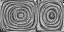

Finished dt: 0.1 cnt: 12 time: 1.36214 s


In [5]:
[&](){
auto try_and_err = [&]() {

    uflic.do_print = true;
    auto render = [&](std::string name, auto array, vtkm::Id x, vtkm::Id y ){
        renderer.Display(array, x,y);
    };
    uflic.callback = render;
    uflic.run(std::shared_ptr(reader));

    //vtkm::cont::ArrayHandle<vtkm::Vec<VecType,Size>> vec;
    //vec.Allocate(x*y);
    //reader->next(vec);
    //uflic.saveQuiver(vtkm::Id2(x,y), vec);

};
try_and_err();
}();